In [17]:
# script to generate expert input summary

In [1]:
import sys

sys.argv = ['23']

import warnings
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import config.config as cc

warnings.filterwarnings('ignore')

from Functions.dataprep import SpecificPrep
import pandas as pd

% load_ext autoreload
% autoreload 2

Has EI


In [4]:
VARIABLES = ['VehPower',
             'VehAge',
             'DrivAge',
             'Density',
             'BonusMalus',
             'Exposure',
             'EI_Density',
             'EI_DrivAge',
             'EI_BonusMalus1',
             'EI_BonusMalus2',
             'EI_VehAge',
             'VehBrand',
             'VehGas',
             'Region',
             'Area',
             'ClaimNb']

In [5]:
specific_transformer = SpecificPrep(cc.metadata['cats_vars_gan'], cc.metadata['cats_vars_xgb'], addei=True,
                                    variables=VARIABLES)
train = pd.read_pickle(cc.train_common)
specific_transformer.fit(train)
train1 = specific_transformer.transform(train)
df1 = specific_transformer.inverse_transform(train1, keep_ei=True)


In [21]:
df1.head()

ClaimNb  VehPower  VehAge  DrivAge  Density  BonusMalus  EI_Density   
0         1      5.00    0.00    55.00     7.10       50.00        0.06  \
1         1      5.00    0.00    55.00     7.10       50.00        0.06   
3         1      7.00    0.00    46.00     4.33       50.00        0.05   
4         1      7.00    0.00    46.00     4.33       50.00        0.05   
11        1      7.00    0.00    56.00     5.15       50.00        0.05   

    EI_DrivAge  EI_BonusMalus1  EI_BonusMalus2  ...  Region_R82  Region_R83   
0         0.06            0.05            0.17  ...        True       False  \
1         0.06            0.05            0.17  ...        True       False   
3         0.05            0.05            0.17  ...       False       False   
4         0.05            0.05            0.17  ...       False       False   
11        0.06            0.05            0.17  ...       False       False   

    Region_R91  Region_R93  Region_R94  Area_2  Area_3  Area_4  Area_5  Area_6  
0        False       False       False   False   False    True   False   False  
1        False       False       False   False   False    True   False   False  
3        False       False       False    True   False   False   False   False  
4        False       False       False    True   False   False   False   False  
11       False        True       False   False    True   False   False   False  

[5 rows x 48 columns]

In [35]:
df2 = df1.groupby('VehAge', as_index=False)['EI_VehAge'].mean()


<Figure size 50x480 with 0 Axes>

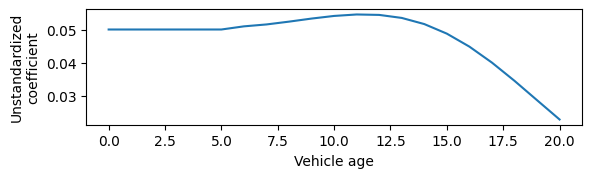

In [36]:
plt.figure().set_figwidth(0.5)
plt.figure().set_figheight(1.5)
plt.plot(df2['VehAge'], df2['EI_VehAge'])
#plt.title(f"GLM: {colname} with {i}-polynomials")
plt.xlabel('Vehicle age')
plt
plt.ylabel("Unstandardized\ncoefficient")
plt.show()

<Axes: xlabel='BonusMalus'>

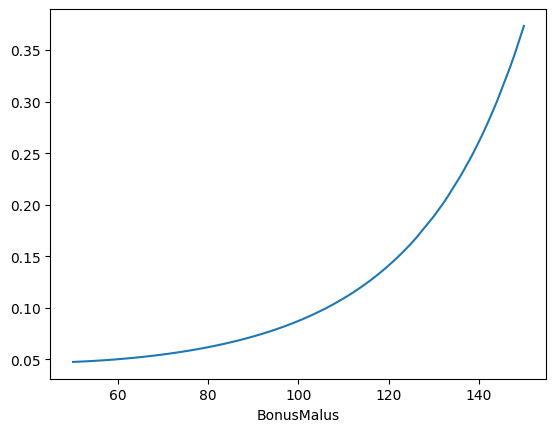

In [29]:
df1.groupby('BonusMalus')['EI_BonusMalus1'].mean().plot()

<Axes: xlabel='Density'>

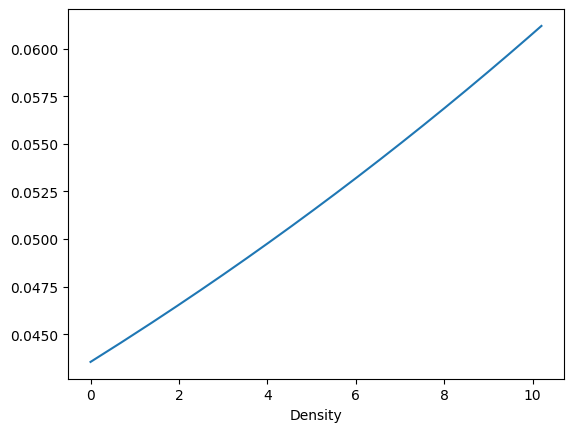

In [28]:
df1.groupby('Density')['EI_Density'].mean().plot()

<Axes: xlabel='DrivAge'>

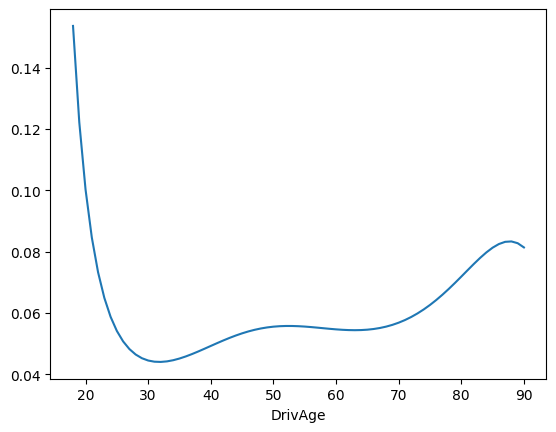

In [26]:
df1.groupby('DrivAge')['EI_DrivAge'].mean().plot()